In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

# READ THE DATASET

In [8]:
sales = pd.read_csv("Leads.csv")

In [10]:
sales.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [12]:
sales.shape

(9240, 37)

In [14]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [16]:
sales.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [18]:
sales.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# DATA CLEANING

In [20]:
sales = sales.replace('Select',np.nan)

In [22]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [24]:
100*sales.isnull().mean().sort_values(ascending=False).head(60)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [26]:
cut_off=40
cols_to_drop=list(sales.columns[100*sales.isnull().mean()>cut_off])
print(cols_to_drop)
print("No. of columns dropped: ",len(cols_to_drop))

['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
No. of columns dropped:  7


In [28]:
sales=sales.drop(cols_to_drop,axis=1)

In [30]:
100*sales.isnull().mean().sort_values(ascending=False).head(60)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

In [32]:
sales["City"].value_counts(normalize=True, dropna=False) * 100

City
NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: proportion, dtype: float64

In [34]:
sales.drop(['City'], axis =1, inplace = True)

In [36]:
sales["Specialization"].value_counts(normalize=True, dropna=False) * 100

Specialization
NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: proportion, dtype: float64

In [38]:
sales['Specialization'] = sales['Specialization'].fillna(value='UnKnown')

In [40]:
sales["Specialization"].value_counts(normalize=True, dropna=False) * 100

Specialization
UnKnown                              36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: proportion, dtype: float64

In [42]:
sales.drop(['Tags'], axis =1, inplace = True)

In [44]:
sales["What matters most to you in choosing a course"].value_counts(normalize=True, dropna=False) * 100

What matters most to you in choosing a course
Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: proportion, dtype: float64

In [46]:
sales.drop(['What matters most to you in choosing a course'], axis =1, inplace = True)

In [48]:
sales["What is your current occupation"].value_counts(normalize=True, dropna=False) * 100

What is your current occupation
Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: proportion, dtype: float64

In [50]:
sales['What is your current occupation'] = sales['What is your current occupation'].fillna(value='UnKnown')

In [52]:
sales["What is your current occupation"].value_counts(normalize=True, dropna=False) * 100

What is your current occupation
Unemployed              60.606061
UnKnown                 29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: proportion, dtype: float64

In [54]:
sales["Country"].value_counts(normalize=True, dropna=False) * 100

Country
India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya 

In [56]:
sales.drop(['Country'], axis =1, inplace = True)

In [58]:
round(100*(sales.isnull().sum()/len(sales)),2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Last Activity                               1.11
Lead Source                                 0.39
Prospect ID                                 0.00
Newspaper Article                           0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Search                                      0.00
Magazine                                    0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Total Time Spent on 

In [60]:
sales['TotalVisits'] = sales['TotalVisits'].fillna(sales['TotalVisits'].mode()[0])
sales['Page Views Per Visit'] = sales['Page Views Per Visit'].fillna(sales['Page Views Per Visit'].mode()[0])
sales['Last Activity'] = sales['Lead Source'].fillna(sales['TotalVisits'].mode()[0])
sales['Lead Source'] = sales['Lead Source'].fillna(sales['TotalVisits'].mode()[0])

In [62]:
round(100*(sales.isnull().sum()/len(sales)),2).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

# HANDLING UNQUIE VALUES

In [64]:
sales.nunique().sort_values(ascending=True)

Receive More Updates About Our Courses         1
I agree to pay the amount through cheque       1
Magazine                                       1
Get updates on DM Content                      1
Update me on Supply Chain Content              1
Search                                         2
A free copy of Mastering The Interview         2
Newspaper                                      2
Digital Advertisement                          2
X Education Forums                             2
Newspaper Article                              2
Converted                                      2
Do Not Call                                    2
Do Not Email                                   2
Through Recommendations                        2
Lead Origin                                    5
What is your current occupation                7
Last Notable Activity                         16
Specialization                                19
Last Activity                                 22
Lead Source         

In [66]:
sales["Receive More Updates About Our Courses"].value_counts(normalize=True, dropna=False) * 100

Receive More Updates About Our Courses
No    100.0
Name: proportion, dtype: float64

In [68]:
sales["I agree to pay the amount through cheque"].value_counts(normalize=True, dropna=False) * 100

I agree to pay the amount through cheque
No    100.0
Name: proportion, dtype: float64

In [70]:
sales["Magazine"].value_counts(normalize=True, dropna=False) * 100

Magazine
No    100.0
Name: proportion, dtype: float64

In [72]:
sales["Get updates on DM Content"].value_counts(normalize=True, dropna=False) * 100

Get updates on DM Content
No    100.0
Name: proportion, dtype: float64

In [74]:
sales["Update me on Supply Chain Content"].value_counts(normalize=True, dropna=False) * 100

Update me on Supply Chain Content
No    100.0
Name: proportion, dtype: float64

# COLUMNS TO DROP

In [76]:
columns_to_drop = ['Receive More Updates About Our Courses', 'I agree to pay the amount through cheque', 'Magazine', 'Get updates on DM Content', 'Update me on Supply Chain Content']
sales.drop(columns=columns_to_drop, inplace=True)
sales.nunique().sort_values(ascending=True)

Through Recommendations                      2
Digital Advertisement                        2
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
Newspaper                                    2
X Education Forums                           2
Newspaper Article                            2
A free copy of Mastering The Interview       2
Search                                       2
Lead Origin                                  5
What is your current occupation              7
Last Notable Activity                       16
Specialization                              19
Last Activity                               22
Lead Source                                 22
TotalVisits                                 41
Page Views Per Visit                       114
Total Time Spent on Website               1731
Lead Number                               9240
Prospect ID                               9240
dtype: int64

In [78]:
numerical_columns = sales.select_dtypes(include=['number']).columns
numerical_columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

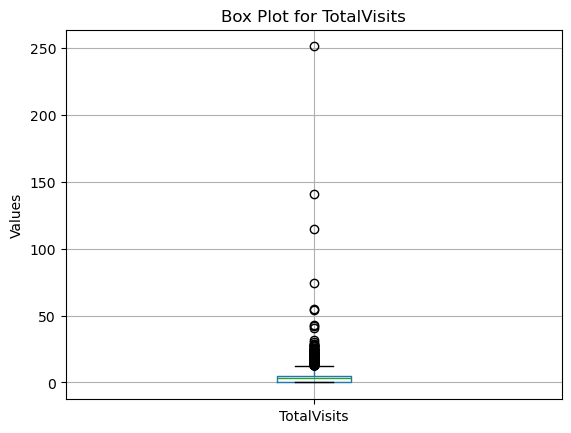

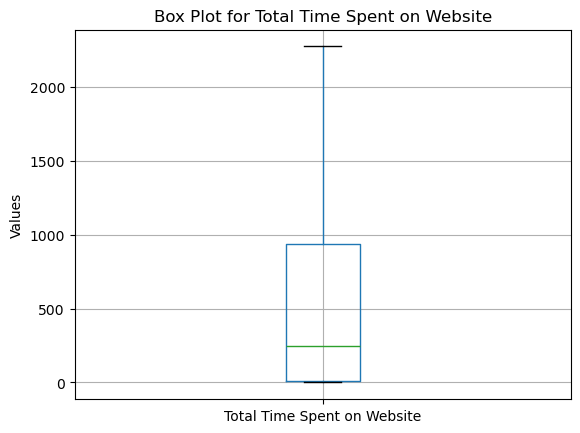

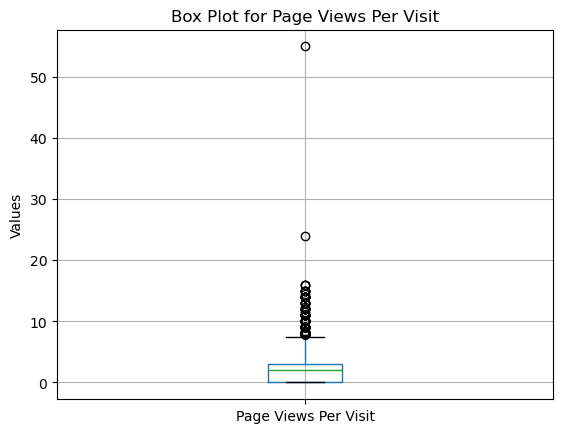

In [80]:
columns_to_plot = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
for column in columns_to_plot:
    plt.figure()
    sales.boxplot(column=column)
    plt.title(f'Box Plot for {column}')
    plt.ylabel('Values')
    plt.show()

# OUTLIERS 

In [82]:
outlier_column = ['Total Time Spent on Website', 'Page Views Per Visit']
sales[outlier_column].describe(percentiles=[.10,.25,.50,.75,.95])

,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000
mean,487.698268,2.327787
std,548.021466,2.164258
min,0.000000,0.000000
10%,0.000000,0.000000
25%,12.000000,0.000000
50%,248.000000,2.000000
75%,936.000000,3.000000
95%,1562.000000,6.000000
max,2272.000000,55.000000


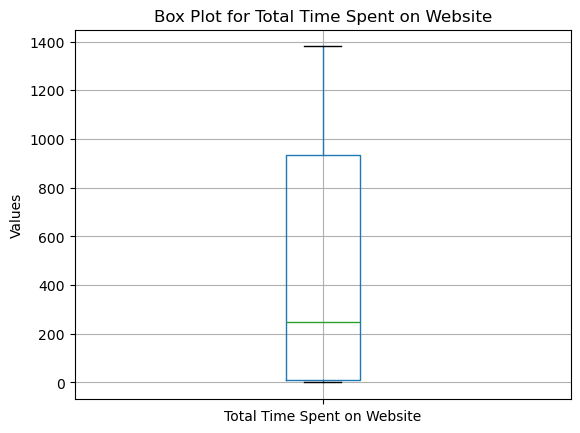

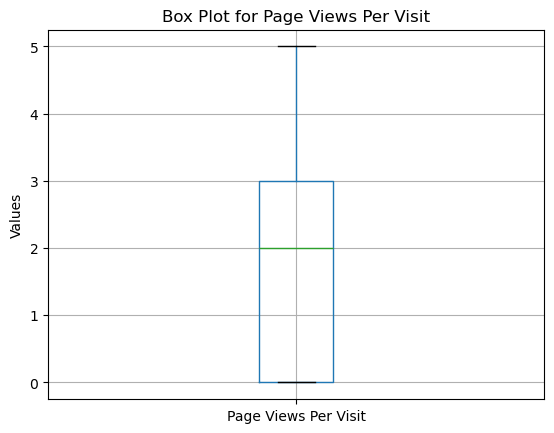

In [84]:
for column in outlier_column:
    # Calculate the 10th and 90th percentiles
    lower_bound = sales[column].quantile(0.10)
    upper_bound = sales[column].quantile(0.90)

    # Cap the outliers
    sales[column] = sales[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
#Recheck Outlier
for column in outlier_column:
    plt.figure()
    sales.boxplot(column=column)
    plt.title(f'Box Plot for {column}')
    plt.ylabel('Values')
    plt.show()

# HANDLING AMBIGIOUS DATA

In [88]:
categorical_columns = sales.select_dtypes(include=['object']).columns

# fetch unique values and its count
values_counts = {col: sales[col].value_counts() for col in categorical_columns}

# Print the unique values and their counts for each categorical column
for column, counts in values_counts.items():
    print(f"Unique values and counts for column '{column}':")
    print(counts)
    print("\n")

Unique values and counts for column 'Prospect ID':
Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
446a290f-b78f-413b-8912-d9c79a847e3a    1
38826741-ffe2-4d37-89c4-1140c66c5560    1
f08604ae-a2fa-4d64-8a42-a95ff2bddfed    1
ce9c2fa0-d2ff-493d-82a9-20c81b175b3e    1
13e3716d-528a-4e90-a441-51ab1d0184d1    1
0047124c-2a76-4c2d-b4e4-83cb2331dbec    1
9608eda6-d8bb-45ec-ab12-eb3c49d52b0f    1
07a52472-4b5d-446f-9048-ffdc7bc65e96    1
804e0cfb-559d-4a63-a635-573f7cfdf441    1
65954c34-8ce7-4d9b-8ae0-f15f15bc9055    1
e02efa11-5bf6-40ee-9194-75d3fffef1d3    1
297fd0fa-69e5-49cf-b794-94c103e388d7    1
f4217ab4-81fd-42d9-a9b4-f8bbfaf1578b    1
b3af7901-09d8-49b7-803f-1cd1e1e8878a    1
7bcca8a9-60ab-4a36-a7f9-cd85aeb10a70    1
13931a86-7053-4522-af99-9e6ae1a6e9b8    1
a303766c-f688-4908-bda8-5fc6d8a35bb8    1
10d4109f-eaa0

In [90]:
sales['Lead Source'] = sales['Lead Source'].replace("google","Google")
sales['Last Activity'] = sales['Last Activity'].replace("google","Google")

In [92]:
sales.drop(['Prospect ID'], axis = 1, inplace=True)

In [94]:
sales.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0.0,0.0,Olark Chat,UnKnown,Unemployed,No,No,No,No,No,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674.0,2.5,Organic Search,UnKnown,Unemployed,No,No,No,No,No,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1380.0,2.0,Direct Traffic,Business Administration,Student,No,No,No,No,No,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305.0,1.0,Direct Traffic,Media and Advertising,Unemployed,No,No,No,No,No,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1380.0,1.0,Google,UnKnown,Unemployed,No,No,No,No,No,No,No,Modified


# EDA ANALYSIS

In [96]:
categorical_columns = sales.select_dtypes(include=['object']).columns.tolist()

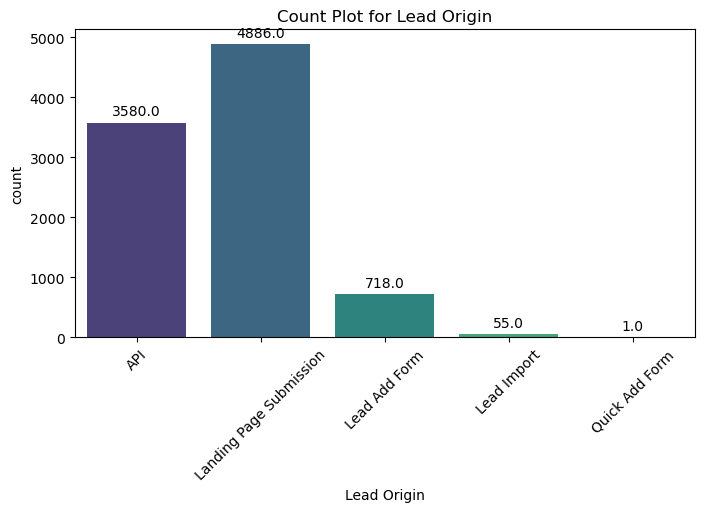

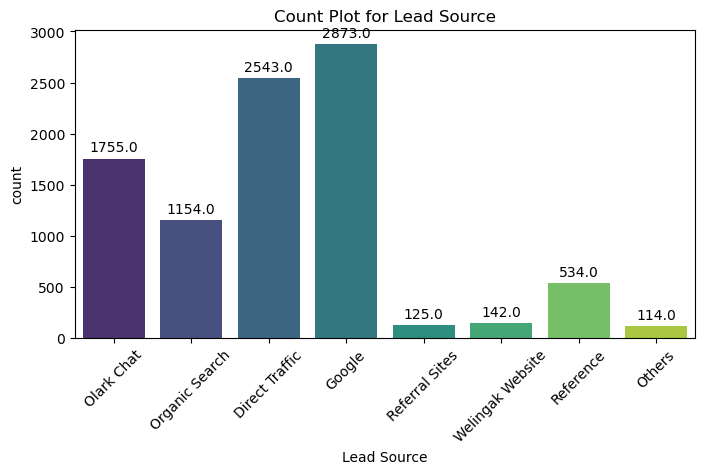

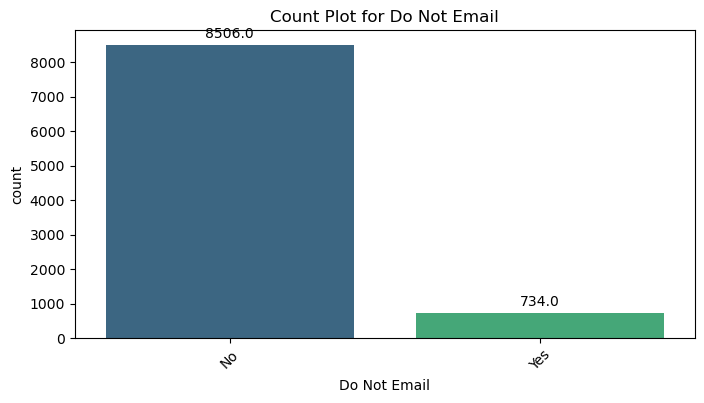

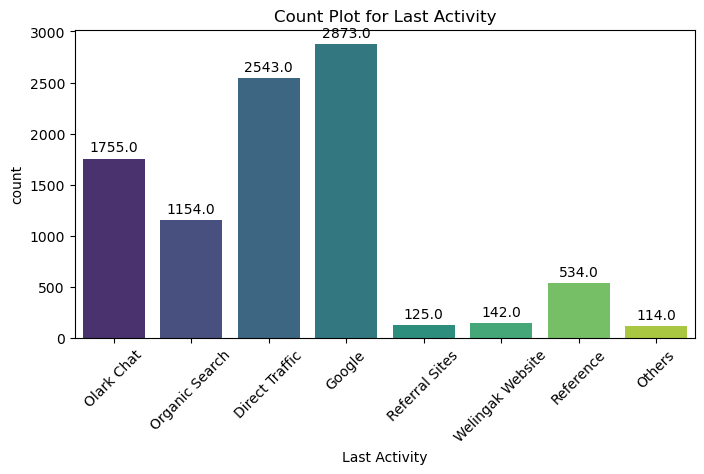

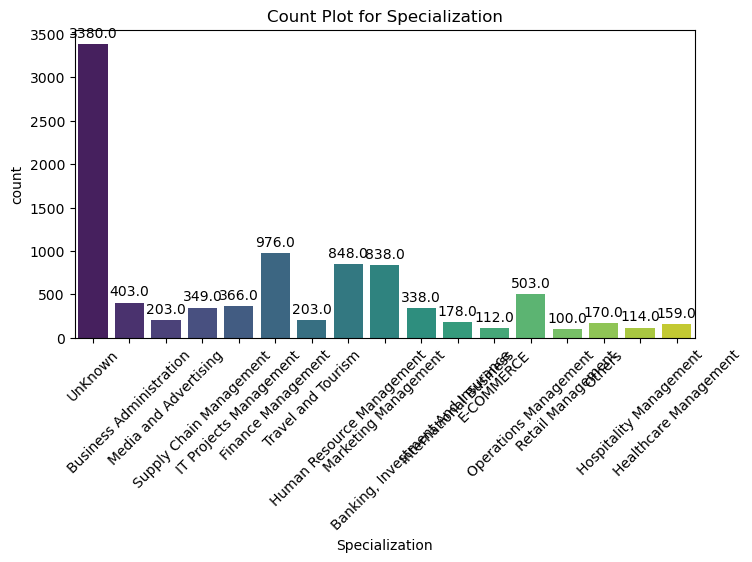

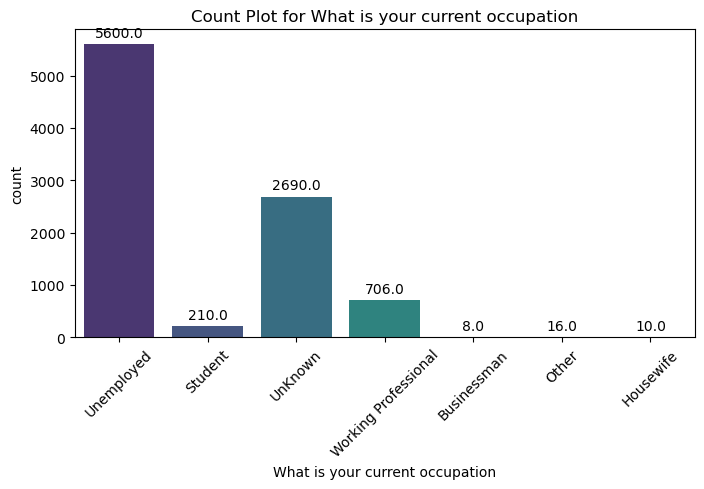

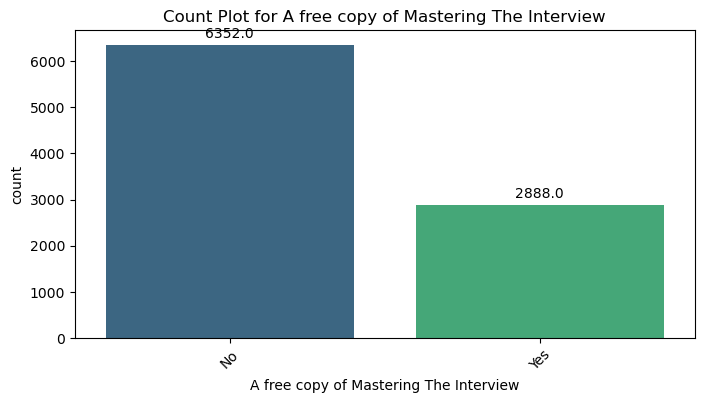

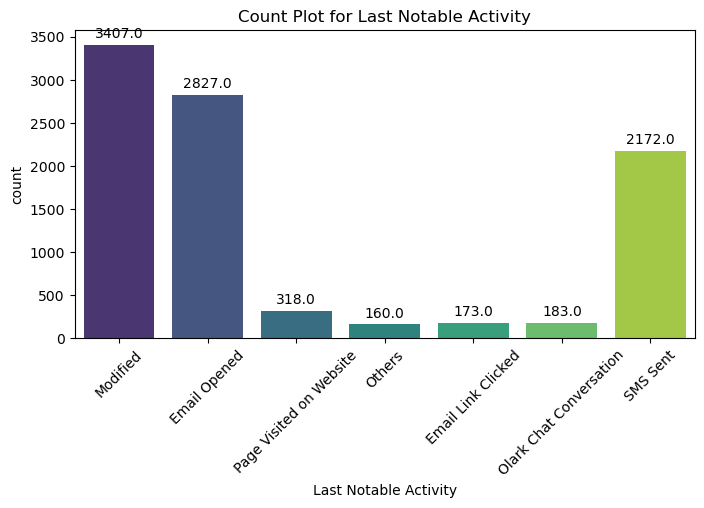

In [306]:
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(x=col, data=sales, palette='viridis')
    plt.title(f'Count Plot for {col}')
    
    # Rotate x-axis labels to be diagonal
    plt.xticks(rotation=45)
    
    # Add data labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')
    plt.show()

In [100]:
values_counts = {col: (sales[col].value_counts(normalize=True) * 100).round(2) for col in categorical_columns}

# Print the unique values and their counts as percentages for each categorical column
for column, counts in values_counts.items():
    print(f"Unique values and counts for column '{column}':")
    print(counts)
    print("\n")

Unique values and counts for column 'Lead Origin':
Lead Origin
Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: proportion, dtype: float64


Unique values and counts for column 'Lead Source':
Lead Source
Google               31.09
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
0.0                   0.39
bing                  0.06
Click2call            0.04
Press_Release         0.02
Social Media          0.02
Live Chat             0.02
youtubechannel        0.01
testone               0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
WeLearn               0.01
blog                  0.01
NC_EDM                0.01
Name: proportion, dtype: float64


Unique values and counts for column 'Do Not Email':
Do Not Email
No     

In [102]:
columns_to_drop = ['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations']

# Dropping columns
sales = sales.drop(columns=columns_to_drop)

In [104]:
categorical_columns=['Lead Source','Last Activity','Specialization','Last Notable Activity']
for col in categorical_columns:
    value_counts = sales[col].value_counts(normalize=True) * 100
    values_to_update = value_counts[value_counts < 1].index
    sales[col] = sales[col].apply(lambda x: 'Others' if x in values_to_update else x)

In [106]:
values_counts = {col: (sales[col].value_counts(normalize=True) * 100).round(2) for col in categorical_columns}

# Print the unique values and their counts as percentages for each categorical column
for column, counts in values_counts.items():
    print(f"Unique values and counts for column '{column}':")
    print(counts)
    print("\n")

Unique values and counts for column 'Lead Source':
Lead Source
Google              31.09
Direct Traffic      27.52
Olark Chat          18.99
Organic Search      12.49
Reference            5.78
Welingak Website     1.54
Referral Sites       1.35
Others               1.23
Name: proportion, dtype: float64


Unique values and counts for column 'Last Activity':
Last Activity
Google              31.09
Direct Traffic      27.52
Olark Chat          18.99
Organic Search      12.49
Reference            5.78
Welingak Website     1.54
Referral Sites       1.35
Others               1.23
Name: proportion, dtype: float64


Unique values and counts for column 'Specialization':
Specialization
UnKnown                              36.58
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain M

# BIVARIATE CATEGORICAL ANALYSIS

In [108]:
numerical_columns = sales.select_dtypes(include=['number']).columns
sales[numerical_columns].describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.394156,465.761905,2.158517
std,23405.995698,0.486714,4.836682,502.991985,1.672716
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,0.000000,12.000000,0.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,1380.000000,5.000000


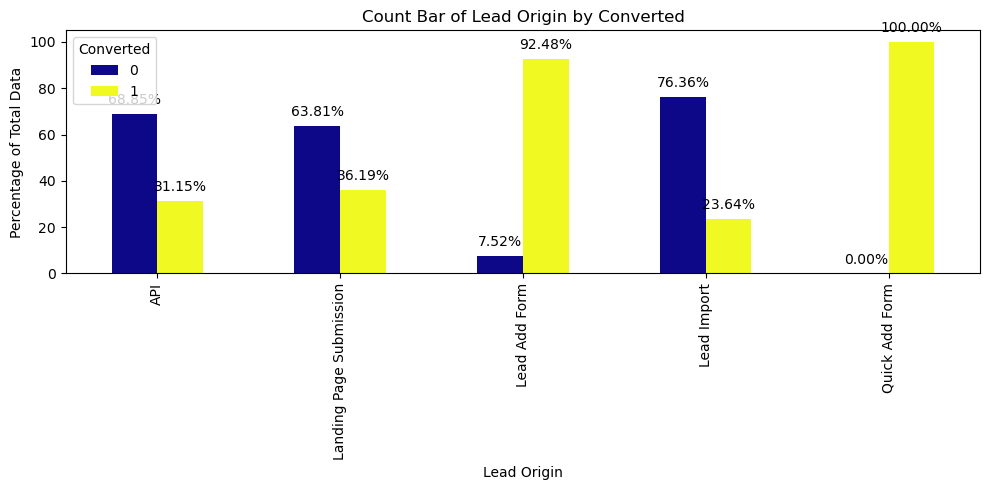

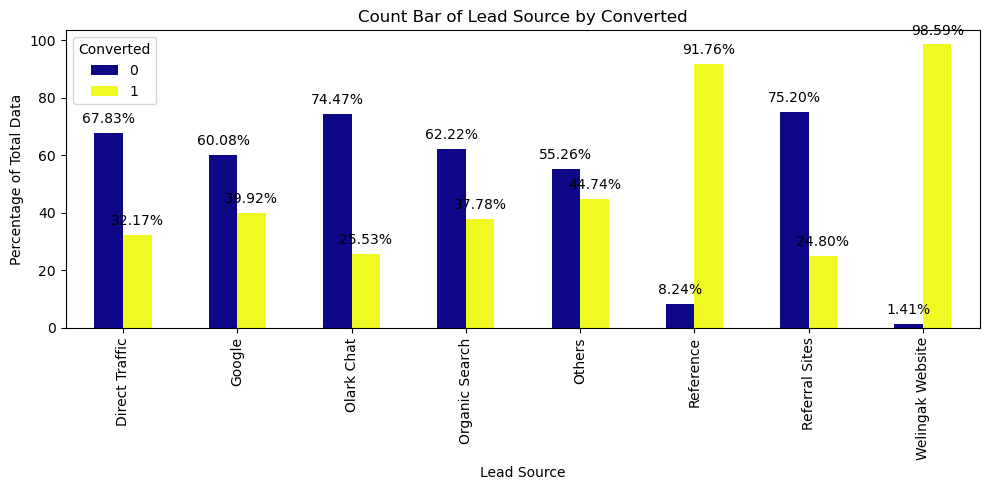

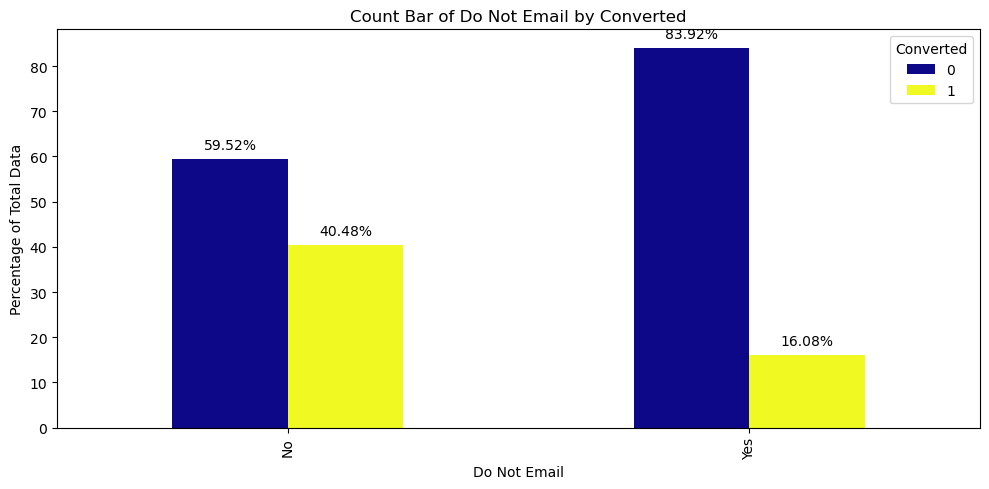

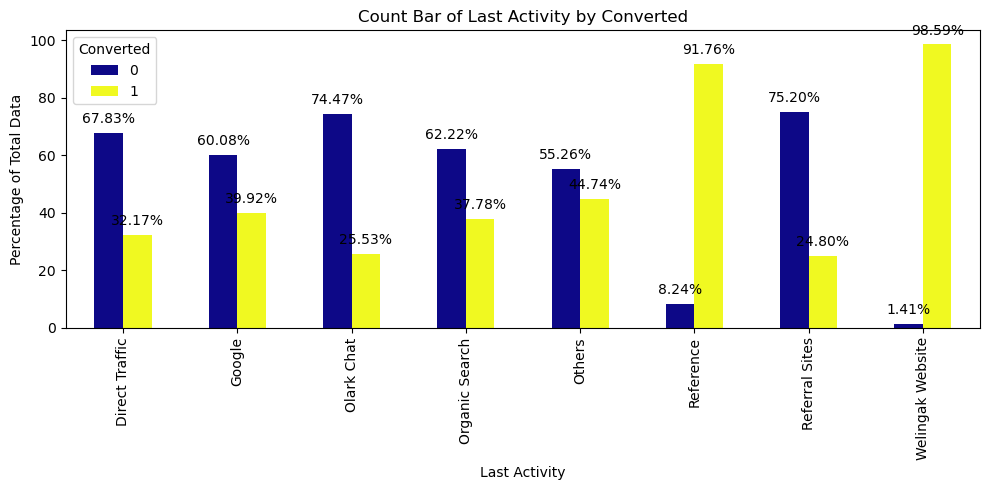

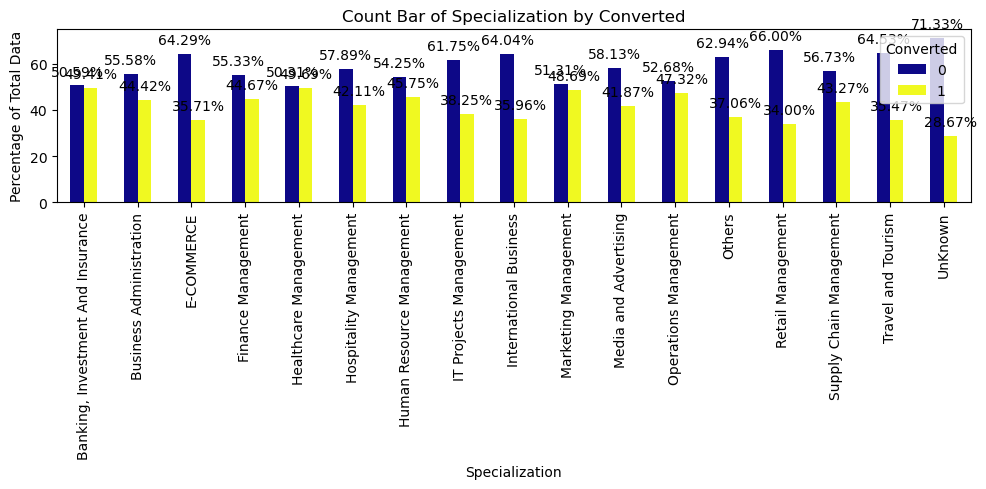

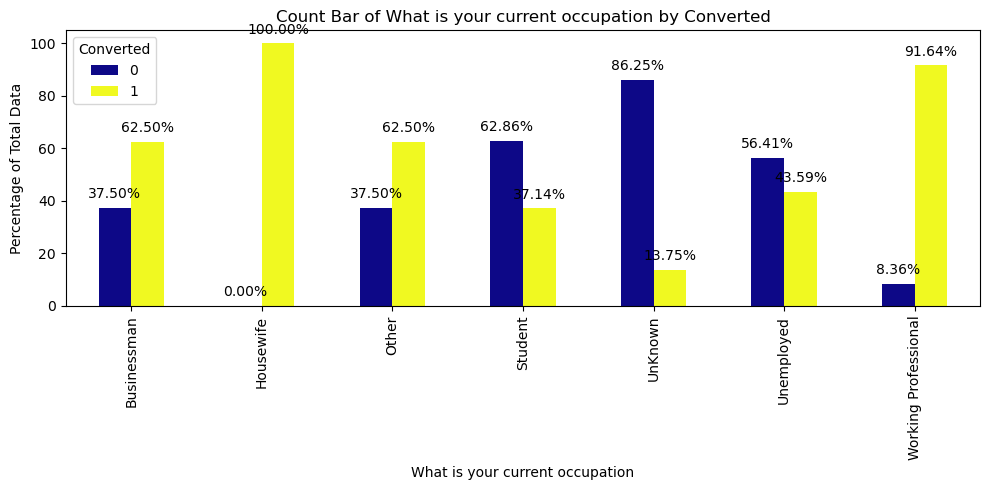

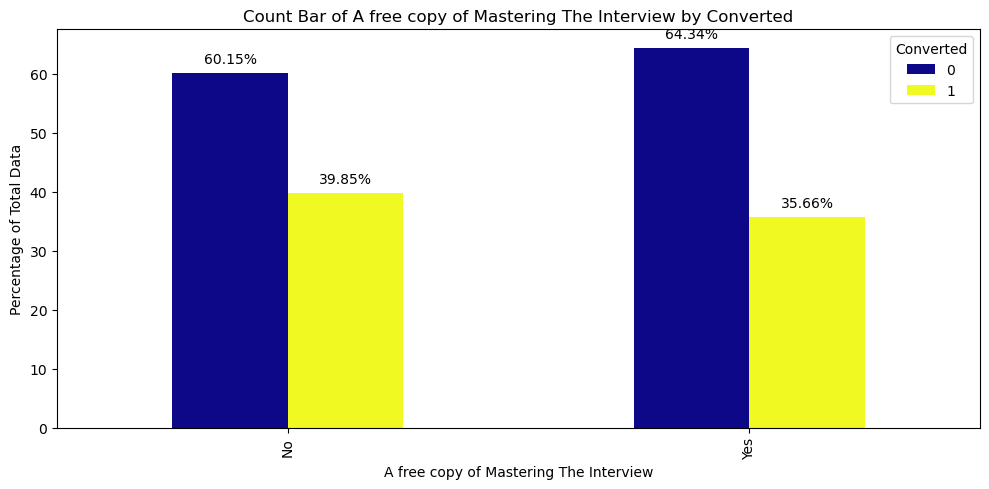

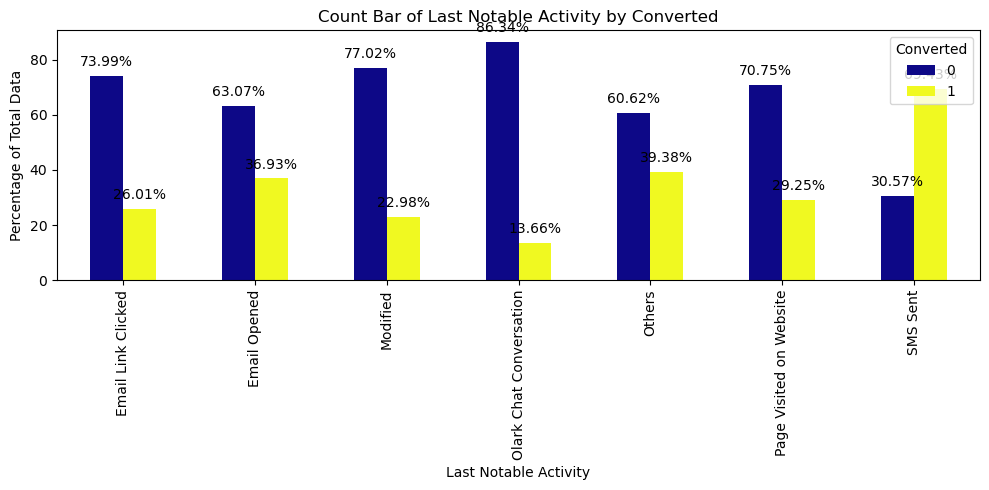

In [308]:
categorical_columns = sales.select_dtypes(include=['object']).columns

# Plot count bar for each categorical column using 'Converted' column
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    crosstab = pd.crosstab(sales[col], sales['Converted'])
    crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100
    ax = crosstab_percentage.plot(kind='bar', ax=plt.gca(), colormap='plasma')
    plt.title(f'Count Bar of {col} by Converted')
    plt.xlabel(col)
    plt.ylabel('Percentage of Total Data')
    
    # Add data labels in percentage of total data
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    plt.tight_layout()
    plt.show()

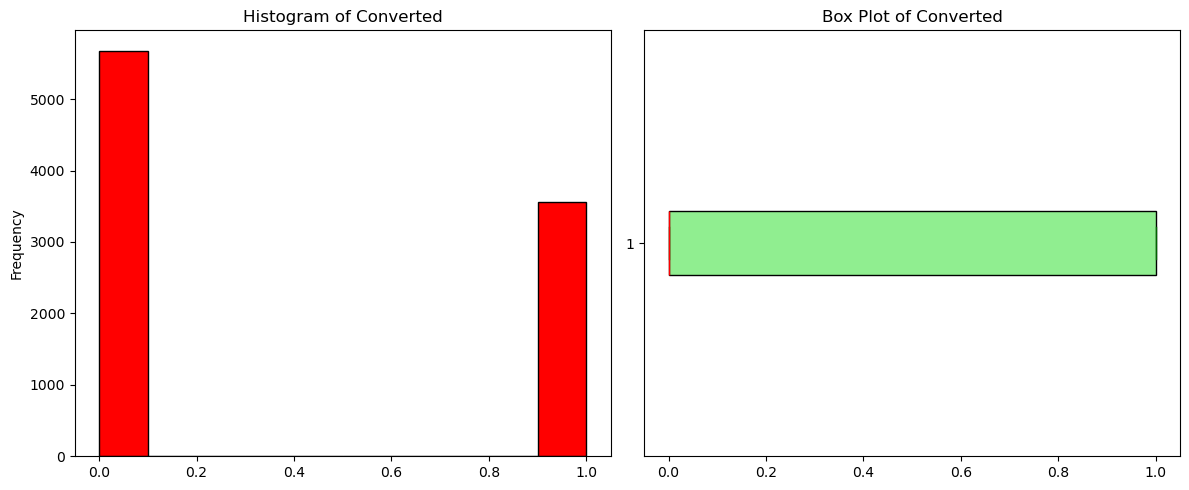

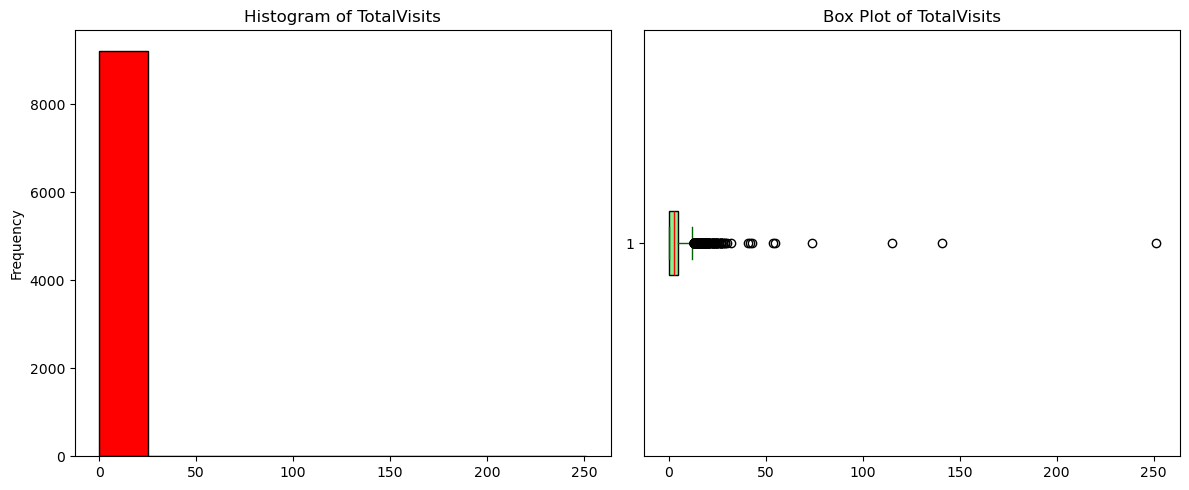

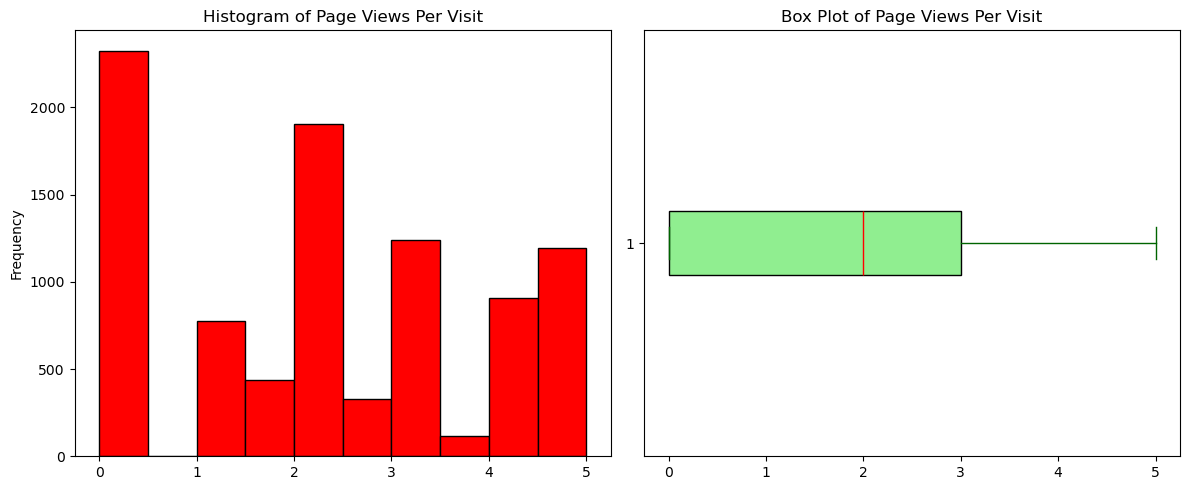

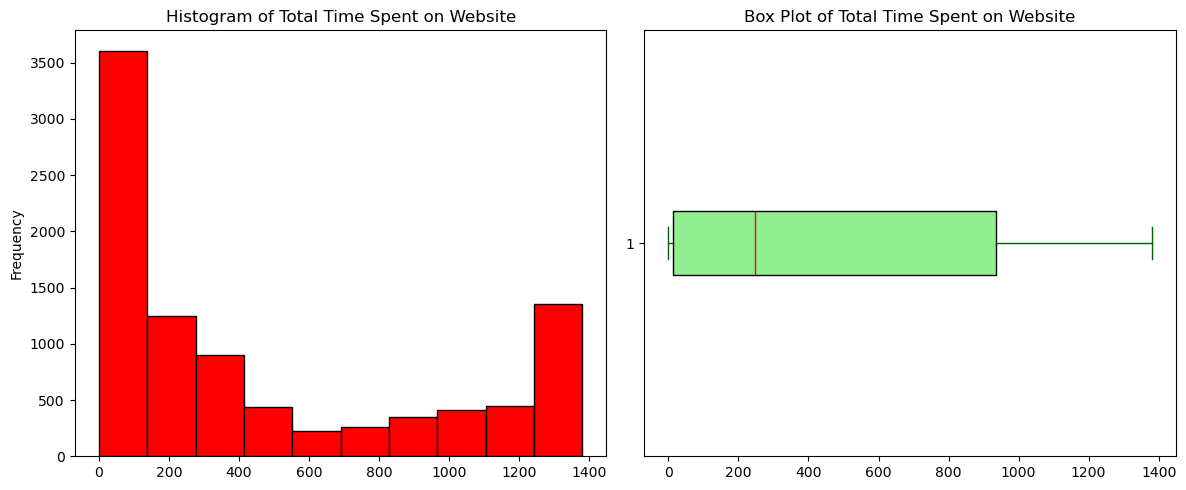

In [312]:
for col in numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histogram with color
    sales[col].plot(kind='hist', ax=axes[0], title=f'Histogram of {col}', color='red', edgecolor='black')
    axes[0].set_ylabel('Frequency')  # Optional, adds clarity to the histogram
    
    # Box plot with color
    box = axes[1].boxplot(sales[col], patch_artist=True, vert=False)  # Use `patch_artist=True` for color
    axes[1].set_title(f'Box Plot of {col}')
    
    # Adding custom color to the box plot
    for patch in box['boxes']:
        patch.set(facecolor='lightgreen')  # Set box face color
    for whisker in box['whiskers']:
        whisker.set(color='darkgreen')  # Set whisker color
    for cap in box['caps']:
        cap.set(color='darkgreen')  # Set cap color
    for median in box['medians']:
        median.set(color='red')  # Set median line color
    
    plt.tight_layout()
    plt.show()

<Figure size 1400x600 with 0 Axes>

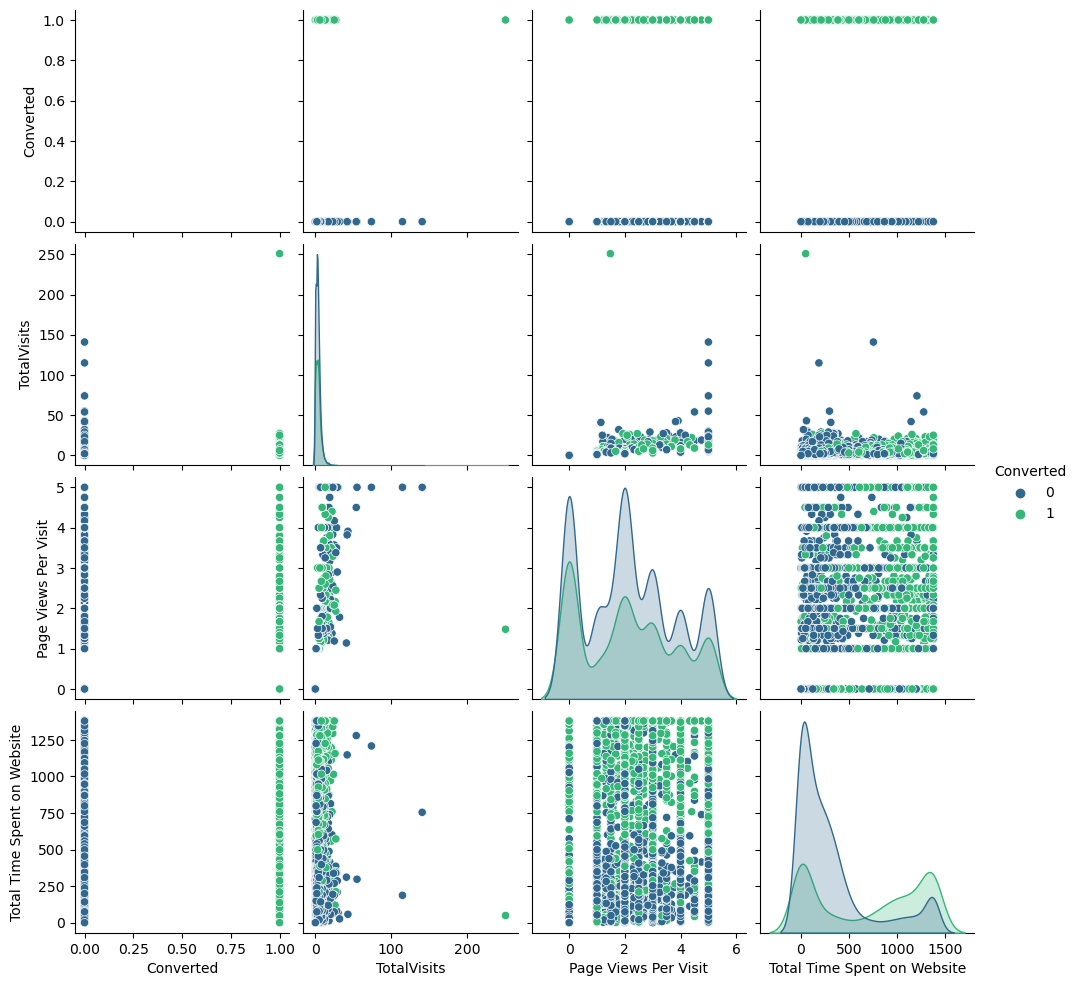

In [318]:
plt.figure(figsize=(14, 6))
sns.pairplot(data=sales,vars=numerical_columns,hue="Converted", palette="viridis")
plt.show()

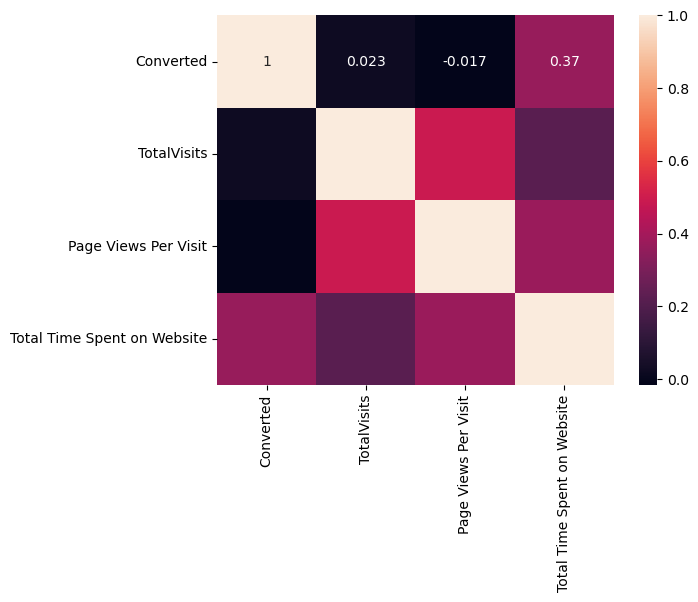

In [116]:
numerical_columns =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
sns.heatmap(data=sales[numerical_columns].corr(),annot=True)
plt.show()

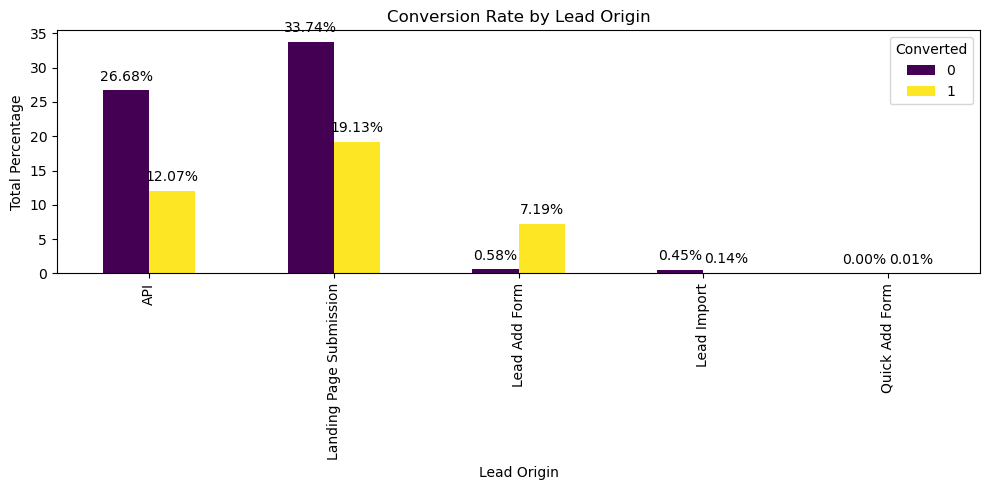

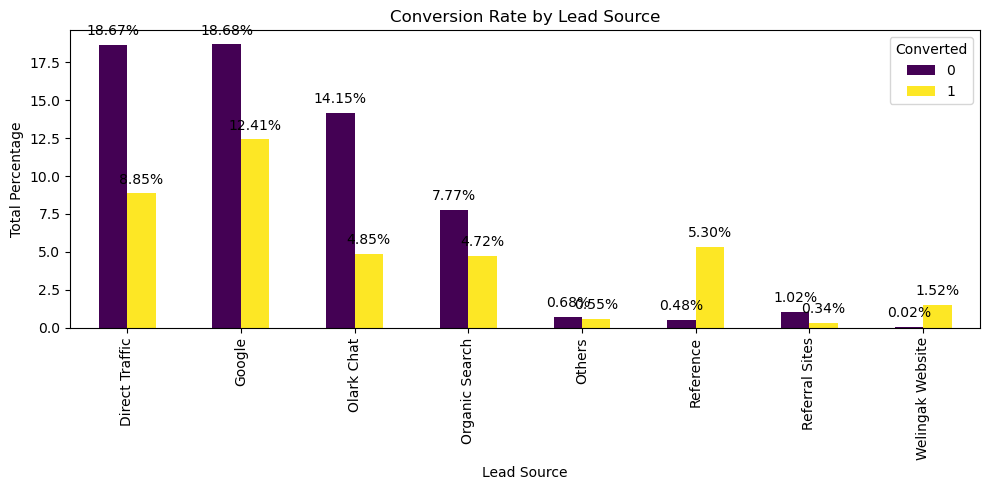

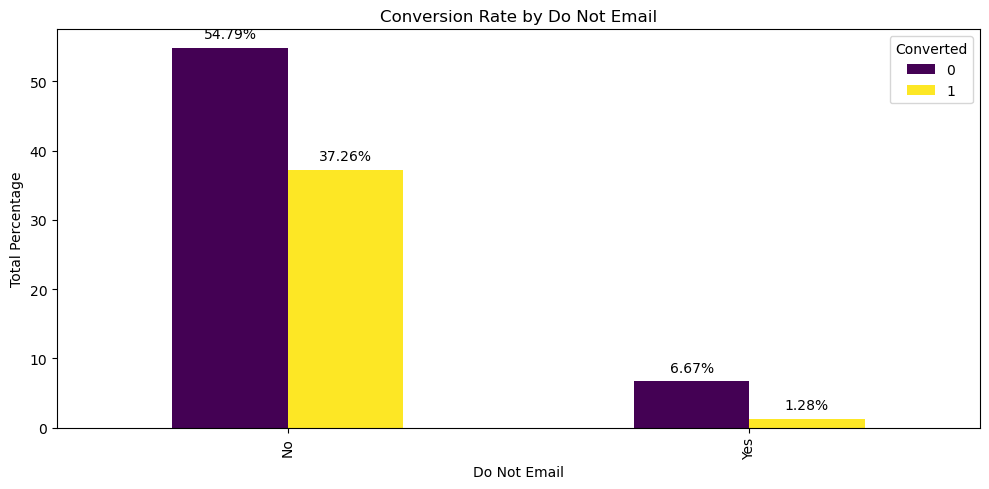

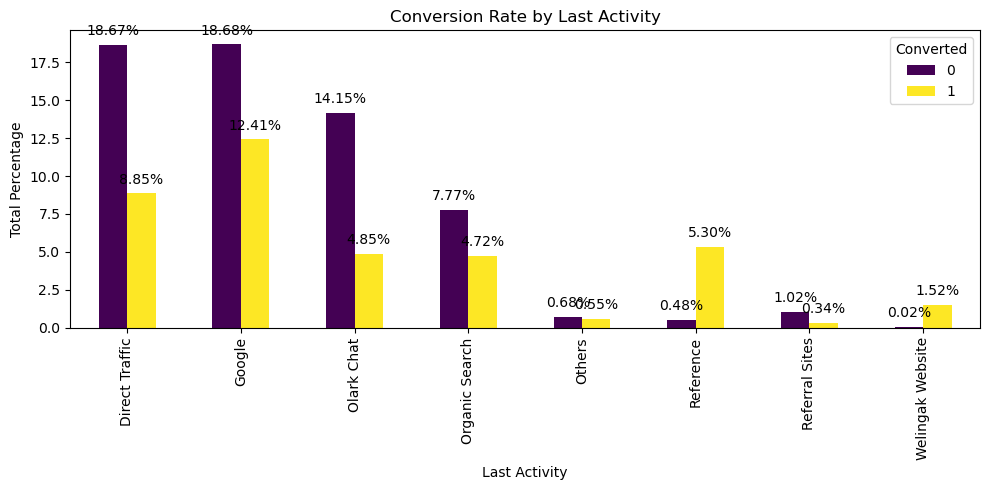

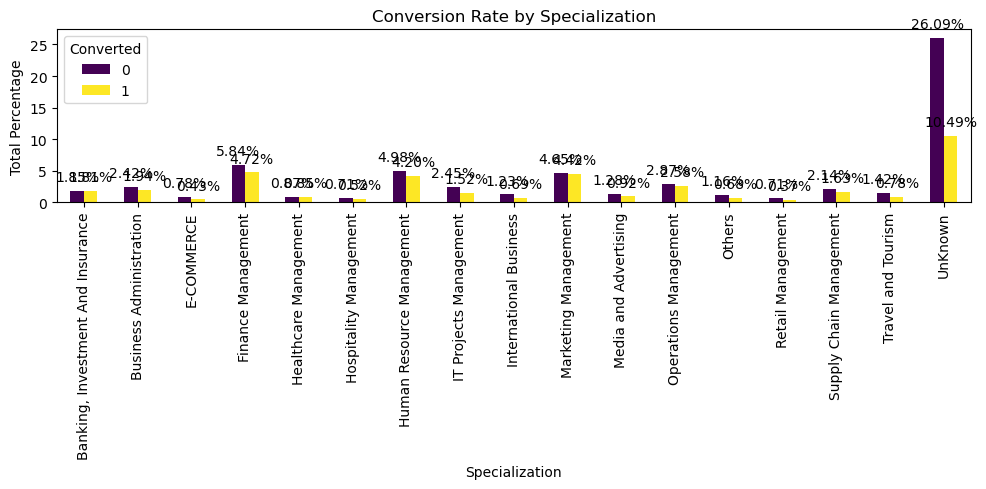

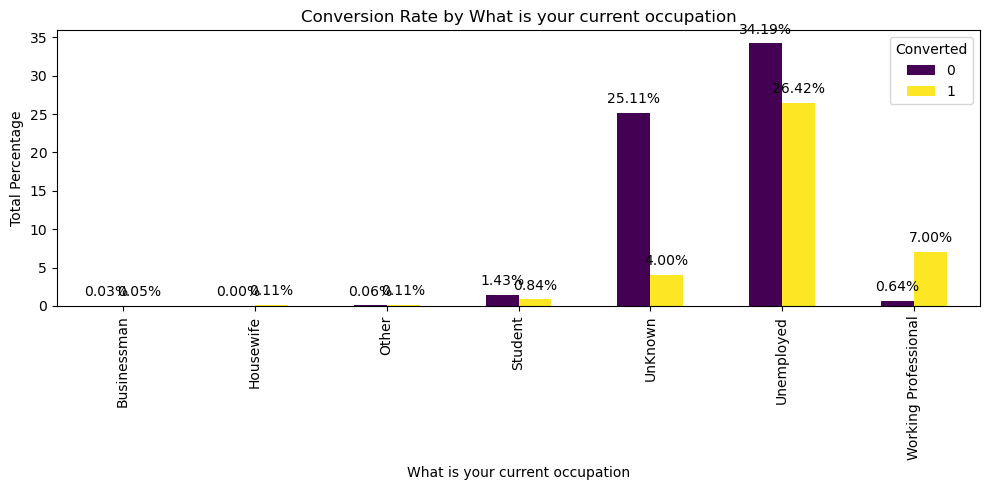

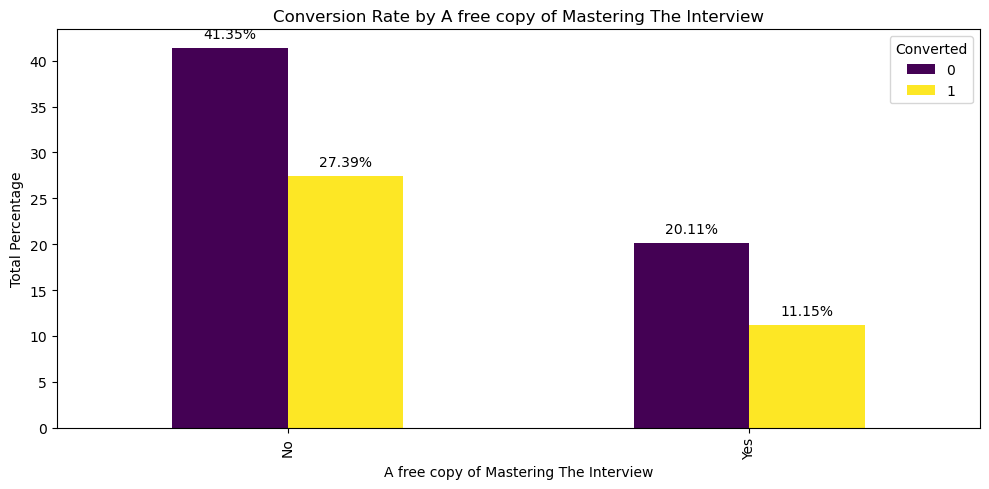

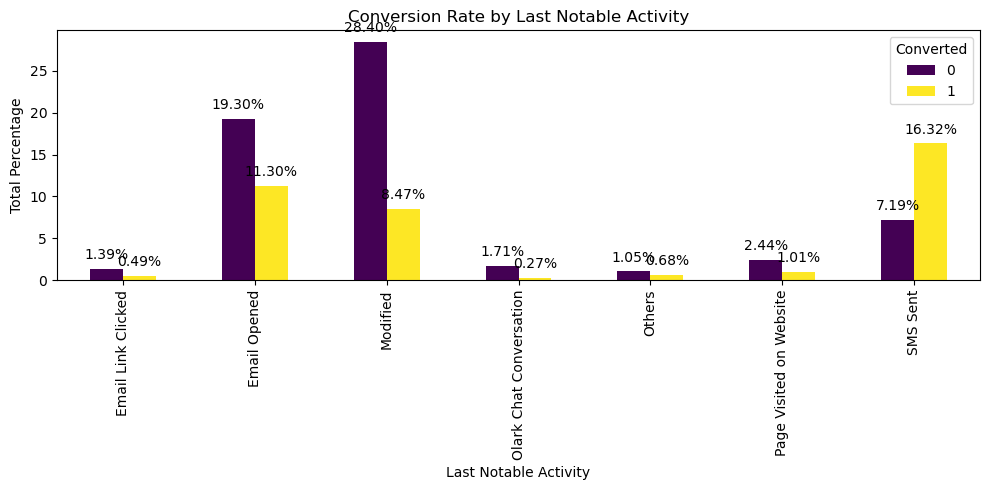

In [324]:
# Plot conversion rate for each categorical column in terms of total percentage
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    
    # Create crosstab and calculate conversion rate in terms of total percentage
    crosstab = pd.crosstab(sales[col], sales['Converted'])
    conversion_rate = crosstab.div(crosstab.sum().sum()) * 100
    
    # Plot the bar chart
    ax = conversion_rate.plot(kind='bar', ax=plt.gca(), colormap="viridis")
    plt.title(f'Conversion Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Total Percentage')
    
    # Add data labels in total percentage
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), textcoords='offset points')
    
    plt.tight_layout()
    plt.show()


In [122]:
numerical_columns  =['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
sales[numerical_columns].describe()

,TotalVisits,Page Views Per Visit,Total Time Spent on Website
count,9240.000000,9240.000000,9240.000000
mean,3.394156,2.158517,465.761905
std,4.836682,1.672716,502.991985
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000
50%,3.000000,2.000000,248.000000
75%,5.000000,3.000000,936.000000
max,251.000000,5.000000,1380.000000


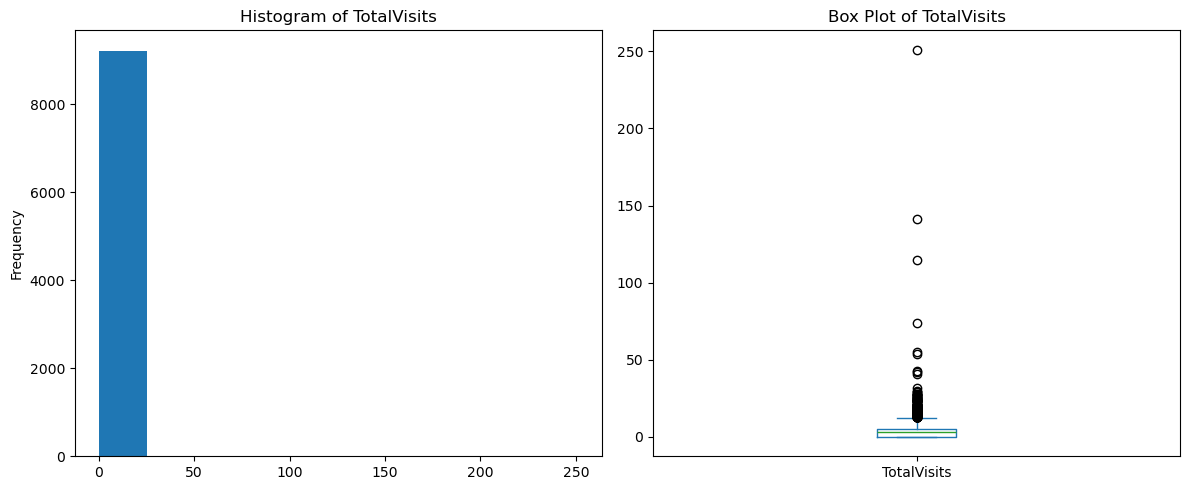

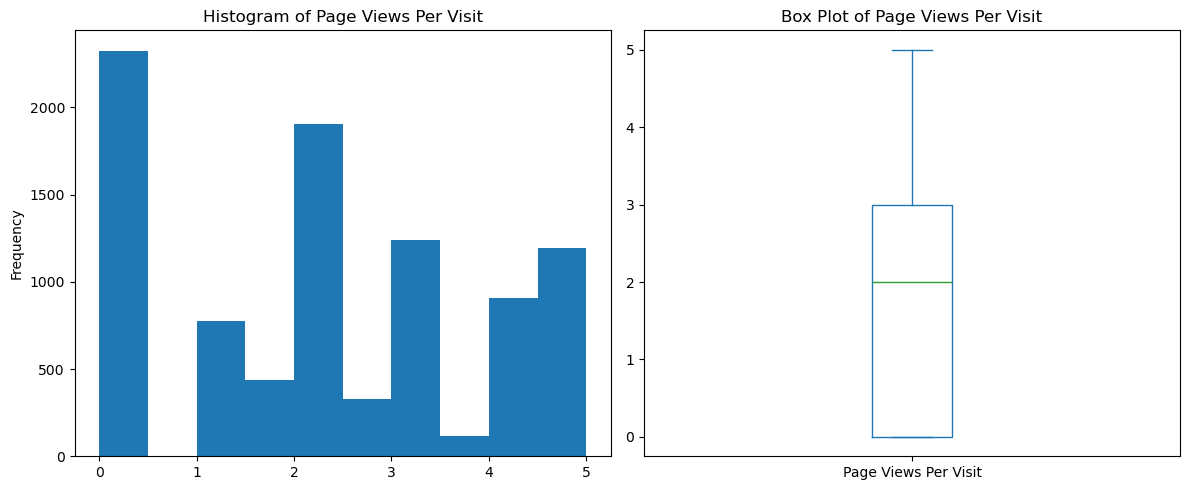

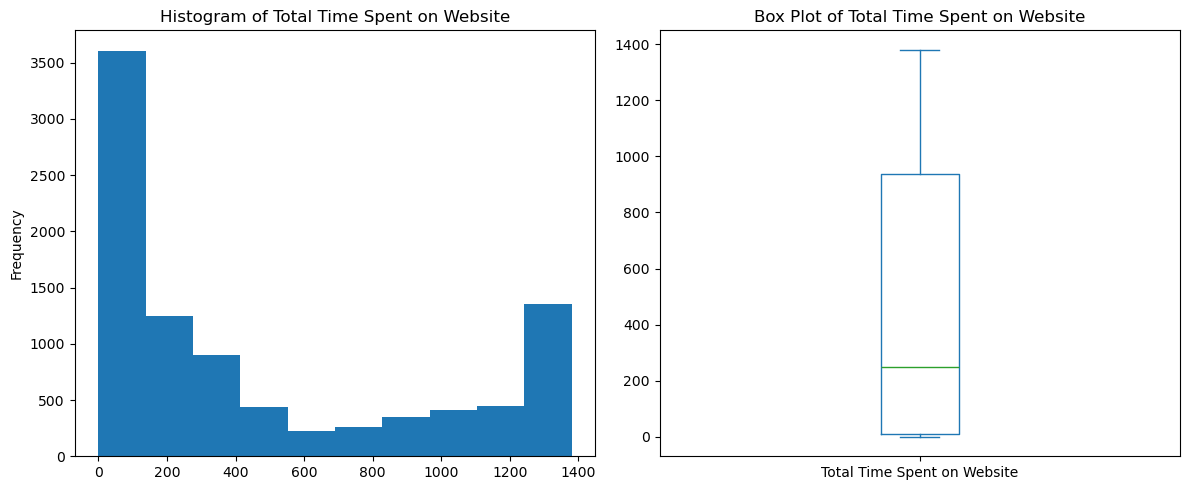

In [124]:
for col in numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Histogram
    sales[col].plot(kind='hist', ax=axes[0], title=f'Histogram of {col}')
    
    # Box plot
    sales[col].plot(kind='box', ax=axes[1], title=f'Box Plot of {col}')
    
    plt.tight_layout()
    plt.show()

# DUMMY VARIABLE

In [128]:
sales_df= sales

In [130]:
# Categorical variables
cat_var = list(sales.columns[sales.dtypes == 'object'])
cat_var

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [132]:
dummy1 = pd.get_dummies(sales_df[['Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Last Notable Activity']], drop_first=True, dtype=int)

# Adding the results to the master dataframe
sales_df = pd.concat([sales_df, dummy1], axis=1)

In [134]:
# We have created dummies for the below variables, so we can drop them
sales_df = sales_df.drop(['Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Last Notable Activity'], axis= 1)

In [136]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 53 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9240 non-null   int64  
 1   Do Not Email                                          9240 non-null   object 
 2   Converted                                             9240 non-null   int64  
 3   TotalVisits                                           9240 non-null   float64
 4   Total Time Spent on Website                           9240 non-null   float64
 5   Page Views Per Visit                                  9240 non-null   float64
 6   A free copy of Mastering The Interview                9240 non-null   object 
 7   Lead Origin_Landing Page Submission                   9240 non-null   int32  
 8   Lead Origin_Lead Add Form                             9240

In [138]:
sales_df.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Google,Last Activity_Olark Chat,Last Activity_Organic Search,Last Activity_Others,Last Activity_Reference,Last Activity_Referral Sites,Last Activity_Welingak Website,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_UnKnown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_UnKnown,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,No,0,0.0,0.0,0.0,No,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1,660728,No,0,5.0,674.0,2.5,No,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
2,660727,No,1,2.0,1380.0,2.0,Yes,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,660719,No,0,1.0,305.0,1.0,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,660681,No,1,2.0,1380.0,1.0,No,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0


In [140]:
# Convert specific boolean columns to integers
columns_to_convert = ['Do Not Email', 'A free copy of Mastering The Interview']
sales_df[columns_to_convert] = sales_df[columns_to_convert].applymap(lambda x: 1 if x == 'yes' else 0)

In [142]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 53 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9240 non-null   int64  
 1   Do Not Email                                          9240 non-null   int64  
 2   Converted                                             9240 non-null   int64  
 3   TotalVisits                                           9240 non-null   float64
 4   Total Time Spent on Website                           9240 non-null   float64
 5   Page Views Per Visit                                  9240 non-null   float64
 6   A free copy of Mastering The Interview                9240 non-null   int64  
 7   Lead Origin_Landing Page Submission                   9240 non-null   int32  
 8   Lead Origin_Lead Add Form                             9240

In [144]:
# dropping lead number as its an identifier
sales_df = sales_df.drop(['Lead Number'], axis= 1)
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 52 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   int64  
 1   Converted                                             9240 non-null   int64  
 2   TotalVisits                                           9240 non-null   float64
 3   Total Time Spent on Website                           9240 non-null   float64
 4   Page Views Per Visit                                  9240 non-null   float64
 5   A free copy of Mastering The Interview                9240 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9240 non-null   int32  
 7   Lead Origin_Lead Add Form                             9240 non-null   int32  
 8   Lead Origin_Lead Import                               9240

# TRAIN TEST SPLIT

In [146]:
# Putting feature variable to X
X = sales_df.drop('Converted', axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Google,Last Activity_Olark Chat,Last Activity_Organic Search,Last Activity_Others,Last Activity_Reference,Last Activity_Referral Sites,Last Activity_Welingak Website,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_UnKnown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_UnKnown,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1,0,5.0,674.0,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
2,0,2.0,1380.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0,1.0,305.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,2.0,1380.0,1.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0


In [148]:
# Putting Target variables to y
y = sales_df["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [150]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# FEATURE SCALING

In [152]:
scaler = StandardScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Google,Last Activity_Olark Chat,Last Activity_Organic Search,Last Activity_Others,Last Activity_Reference,Last Activity_Referral Sites,Last Activity_Welingak Website,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_UnKnown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_UnKnown,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1871,0,-0.645678,-0.920363,-1.289918,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
6795,0,0.109111,0.048791,-0.491077,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
3516,0,0.297808,-0.709417,0.211663,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
8105,0,0.297808,1.527397,1.713243,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3934,0,-0.645678,-0.920363,-1.289918,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0


# CORRELATIONS

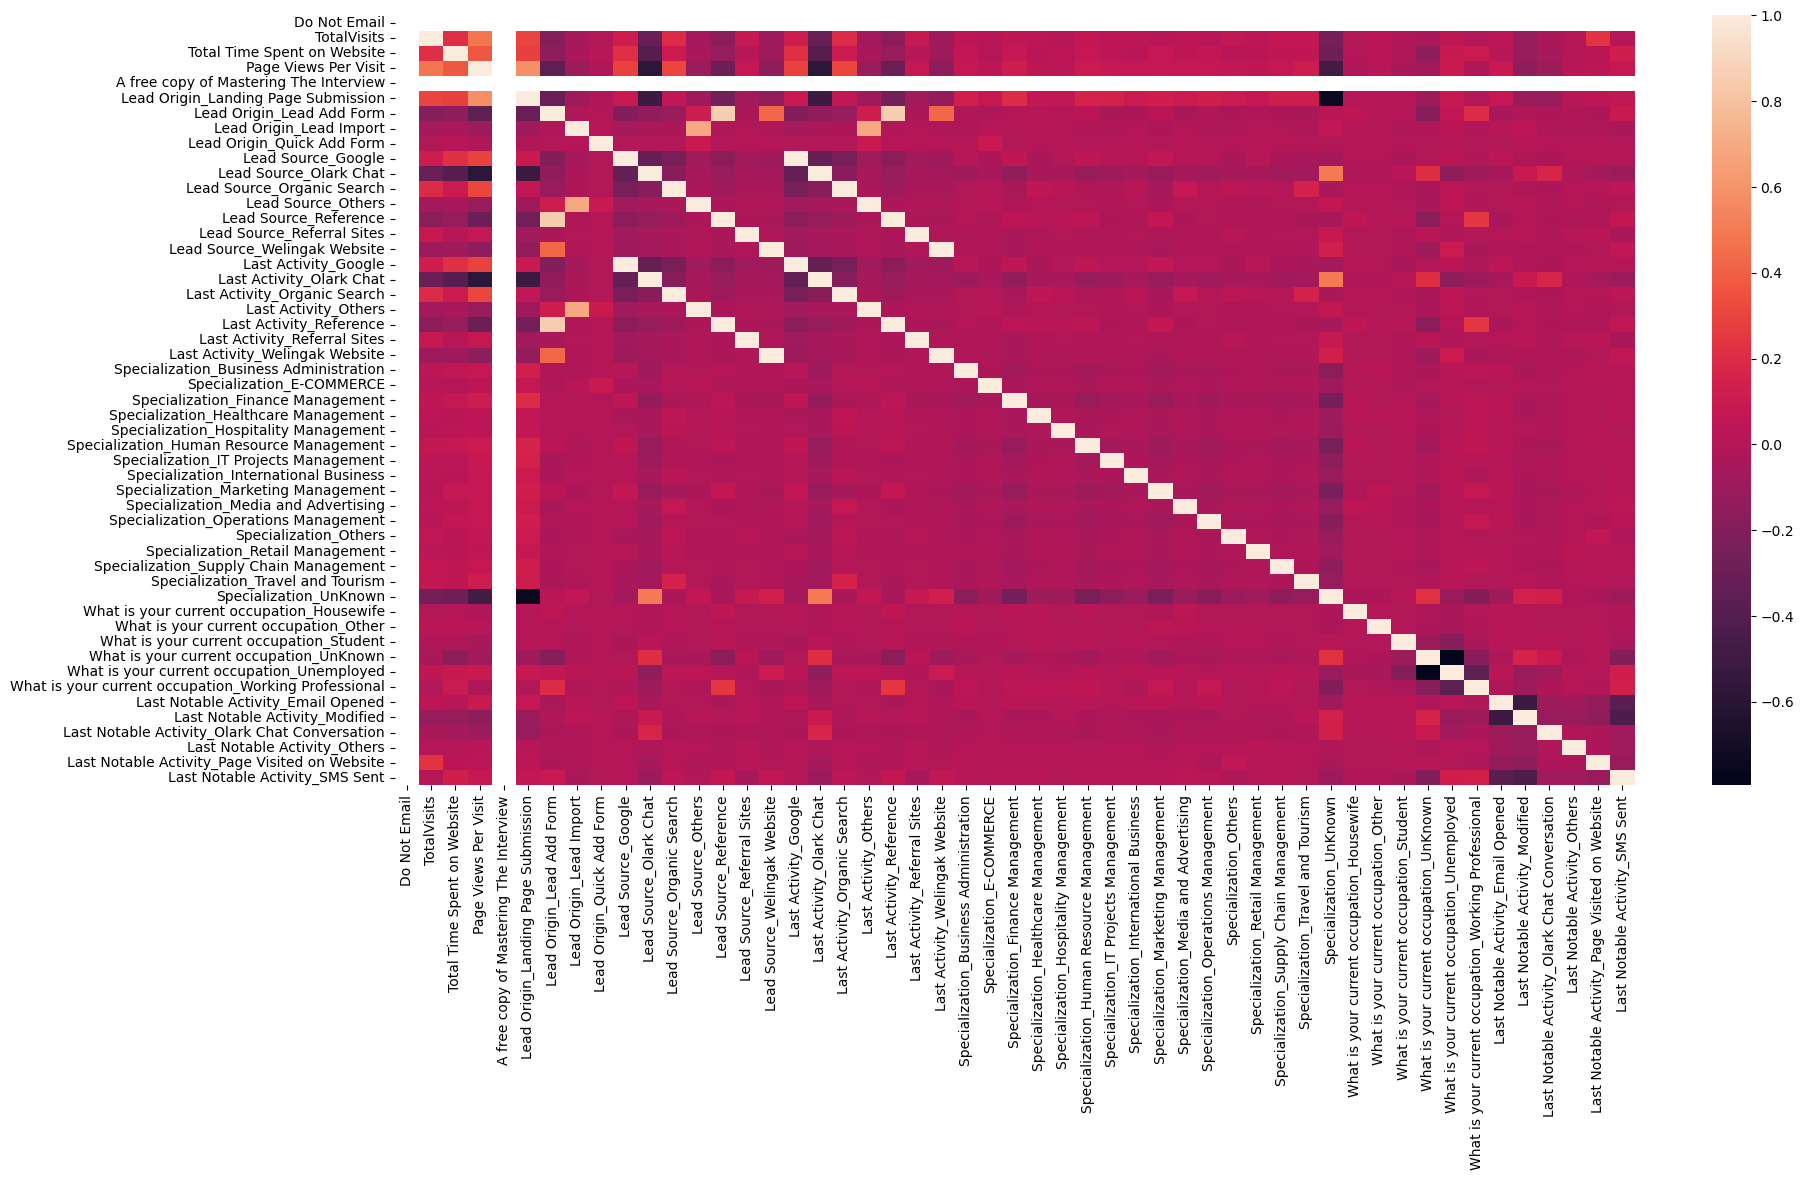

In [154]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X.corr(),annot = True)
plt.show()

# MODEL BUILDING

In [156]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [158]:
# Import RFE
from sklearn.feature_selection import RFE

In [160]:
import statsmodels.api as sm

In [162]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6425
Model Family:                Binomial   Df Model:                           42
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.1
Date:                Sun, 17 Nov 2024   Deviance:                       5186.1
Time:                        18:20:34   Pearson chi2:                 6.87e+03
No. Iterations:                    51   Pseudo R-squ. (CS):             0.4099
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6829      1.093     -0.625      0.532      -2.825       1.459
Do Not Email                                            13.2557      7.904      1.677      0.094      -2.236      28.747
TotalVisits                                              0.1542      0.048      3.209      0.001       0.060       0.248
Total Time Spent on Website                              1.1305      0.041     27.857      0.000       1.051       1.210
Page Views Per Visit                                    -0.1462      0.059     -2.465      0.014      -0.262      -0.030
A free copy of Mastering The Interview                   8.6976      5.186      1.677      0.094      -1.467      18.862
Lead Origin_Landing Page Submission                     -0.8955      0.138     -6.475      0.000      -1.167      -0.624
Lead Origin_Lead Add Form                                1.9381      0.734      2.640      0.008       0.500       3.377
Lead Origin_Lead Import                                 -0.5518      0.804     -0.686      0.492      -2.127       1.024
Lead Origin_Quick Add Form                            1.125e+08   6.71e+07      1.677      0.094    -1.9e+07    2.44e+08
Lead Source_Google                                     -11.7984      7.162     -1.647      0.099     -25.835       2.238
Lead Source_Olark Chat                                  -6.0908      4.030     -1.511      0.131     -13.989       1.808
Lead Source_Organic Search                               2.5945      1.488      1.743      0.081      -0.323       5.512
Lead Source_Others                                      -4.0667      2.676     -1.520      0.129      -9.311       1.177
Lead Source_Reference                                    1.7458      0.704      2.481      0.013       0.367       3.125
Lead Source_Referral Sites                              -4.1366      2.532     -1.634      0.102      -9.099       0.825
Lead Source_Welingak Website                             2.9988      0.821      3.654      0.000       1.390       4.607
Last Activity_Google                                    12.2232      7.162      1.707      0.088      -1.814      26.260
Last Activity_Olark Chat                                 7.4236      4.030      1.842      0.065      -0.475      15.322
Last Activity_Organic Search                            -2.3930      1.488     -1.608      0.108      -5.310       0.524
Last Activity_Others                                     4.8499      2.676      1.813      0.070      -0.394      10.094
Last Activity_Reference                                 -0.2448      0.704     -0.348      0.728      -1.624       1.134
Last Activity_Referral Sites                             4

# FEATURE SELECTION RFE

In [164]:
logreg = LogisticRegression()

In [166]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [168]:
rfe.support_

array([False, False,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False,  True, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False,  True, False,  True,
       False,  True,  True, False, False,  True])

In [170]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 37),
 ('TotalVisits', False, 19),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('A free copy of Mastering The Interview', False, 36),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 15),
 ('Lead Origin_Quick Add Form', False, 28),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Olark Chat', False, 2),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Others', False, 11),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 30),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Google', False, 17),
 ('Last Activity_Olark Chat', True, 1),
 ('Last Activity_Organic Search', False, 29),
 ('Last Activity_Others', False, 14),
 ('Last Activity_Reference', True, 1),
 ('Last Activity_Referral Sites', False, 21),
 ('Last Activity_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 16

In [172]:
col = X_train.columns[rfe.support_]

In [ ]:
X_train = X_train[col]

# MODEL 1

In [175]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6425
Model Family:                Binomial   Df Model:                           42
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.1
Date:                Sun, 17 Nov 2024   Deviance:                       5186.1
Time:                        18:26:41   Pearson chi2:                 6.87e+03
No. Iterations:                    51   Pseudo R-squ. (CS):             0.4099
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

# MODEL 2

In [177]:
X_train = X_train.drop(['What is your current occupation_Housewife'], axis=1)

In [179]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6426
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 17 Nov 2024   Deviance:                   1.3539e+05
Time:                        18:27:42   Pearson chi2:                 6.62e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

# VIF

In [181]:
def get_vif(model_df):
    vif_data = pd.DataFrame()
    vif_data['Features'] = model_df.columns
    vif_data['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    vif_data['VIF'] = vif_data['VIF'].round(2)
    return vif_data.sort_values(by='VIF', ascending=False).reset_index(drop=True)

In [183]:
get_vif(X_train)

,Features,VIF
0,Last Activity_Welingak Website,inf
1,Last Activity_Organic Search,inf
2,Last Activity_Referral Sites,inf
3,Last Activity_Reference,inf
4,Last Activity_Others,inf
5,Lead Source_Google,inf
6,Lead Source_Olark Chat,inf
7,Lead Source_Organic Search,inf
8,Lead Source_Others,inf
9,Lead Source_Reference,inf


# MODEL 3

In [187]:
X_train = X_train.drop(['Last Activity_Welingak Website'], axis=1)

In [189]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6426
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 17 Nov 2024   Deviance:                   1.3806e+05
Time:                        18:32:15   Pearson chi2:                 6.75e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [191]:
get_vif(X_train)

,Features,VIF
0,Last Activity_Referral Sites,inf
1,Last Activity_Google,inf
2,Last Activity_Reference,inf
3,Last Activity_Others,inf
4,Last Activity_Organic Search,inf
5,Lead Source_Google,inf
6,Lead Source_Olark Chat,inf
7,Lead Source_Organic Search,inf
8,Lead Source_Others,inf
9,Lead Source_Reference,inf


# PREDICTION

In [193]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    1.0
6795    0.0
3516    0.0
8105    1.0
3934    0.0
4844    1.0
3297    1.0
8071    1.0
987     0.0
7423    1.0
dtype: float64

In [195]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1., 0., 0., 1., 0., 1., 1., 1., 0., 1.])

In [197]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,0,1.0
1,0,0.0
2,0,0.0
3,0,1.0
4,0,0.0


In [199]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,predicted
0,0,1.0,1
1,0,0.0,0
2,0,0.0,0
3,0,1.0,1
4,0,0.0,0


# MODEL EVALUATION

In [201]:
from sklearn import metrics

In [203]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3391  611]
 [ 888 1578]]


In [205]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.768243661100804


In [207]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [209]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6399026763990268

In [211]:
# Let us calculate specificity
TN / float(TN+FP)

0.8473263368315842

In [213]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.1526736631684158


In [215]:
# positive predictive value 
print (TP / float(TP+FP))

0.7208771128369118


In [217]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7924748773077822


Result:
Accuracy:76.8%
Sensivity:63.9%
Specificity:84.7%
False positive rate: 15.2%

# PLOTTING THE ROC CURVE

In [219]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [221]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

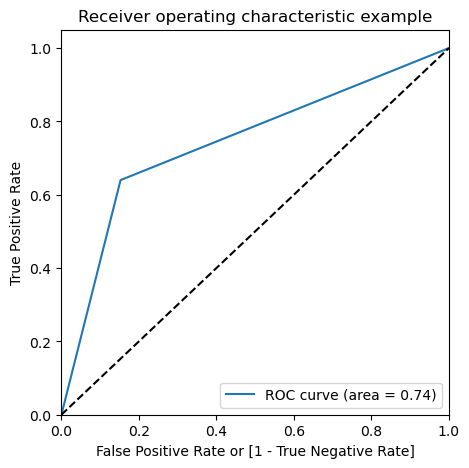

In [223]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

# FINDING OPTIMAL CUTOFF POINT

In [225]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,1.0,1,1,1,1,1,1,1,1,1,1,1
1,0,0.0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,1,1,1,1,1,1,1,1,1,1,1
4,0,0.0,0,0,0,0,0,0,0,0,0,0,0


In [227]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.768244  0.639903  0.847326
0.1   0.1  0.768244  0.639903  0.847326
0.2   0.2  0.768244  0.639903  0.847326
0.3   0.3  0.768244  0.639903  0.847326
0.4   0.4  0.768244  0.639903  0.847326
0.5   0.5  0.768244  0.639903  0.847326
0.6   0.6  0.768244  0.639903  0.847326
0.7   0.7  0.768244  0.639903  0.847326
0.8   0.8  0.768244  0.639903  0.847326
0.9   0.9  0.768244  0.639903  0.847326


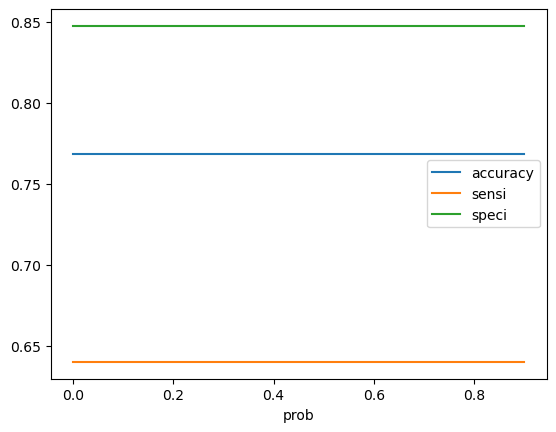

In [229]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [231]:
test = y_train_pred_final
test['final_predicted']= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
print(metrics.accuracy_score(test.Converted, test.final_predicted))
confusion_test = metrics.confusion_matrix(test.Converted, test.final_predicted )
confusion_test

0.768243661100804


array([[3391,  611],
       [ 888, 1578]], dtype=int64)

In [233]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives
TP / float(TP+FN)

0.6399026763990268

In [235]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,1.0,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0


In [237]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.768243661100804

In [239]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3391,  611],
       [ 888, 1578]], dtype=int64)

In [241]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [243]:
TP / float(TP+FN)

0.6399026763990268

In [245]:
TN / float(TN+FP)

0.8473263368315842

In [247]:
print(FP/ float(TN+FP))

0.1526736631684158


In [249]:
print (TP / float(TP+FP))

0.7208771128369118


In [251]:
print (TN / float(TN+ FN))

0.7924748773077822


# PRECISION AND RECALL

In [263]:
from sklearn.metrics import precision_score, recall_score

In [267]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7208771128369118

In [269]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6399026763990268

In [271]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7208771128369118

In [273]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6399026763990268

# PRECISION AND RECALL CURVE

In [279]:
from sklearn.metrics import precision_recall_curve

In [281]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      1
 11      0
 12      1
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      1
 20      1
 21      1
 22      1
 23      1
 24      1
 25      1
 26      0
 27      1
 28      1
 29      0
 30      1
 31      0
 32      1
 33      0
 34      1
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      0
 43      0
 44      0
 45      0
 46      1
 47      0
 48      0
 49      1
 50      0
 51      1
 52      1
 53      1
 54      1
 55      0
 56      1
 57      0
 58      1
 59      0
 60      0
 61      0
 62      1
 63      0
 64      1
 65      0
 66      1
 67      1
 68      0
 69      1
 70      1
 71      0
 72      1
 73      0
 74      0
 75      0
 76      1
 77      0
 78      0
 79      0
 80      0
 81      0
 82      0
 83      0
 84      0
 85      0
 86      0
 87      0
 88      1
 89      1
 90      1

In [289]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.predicted)

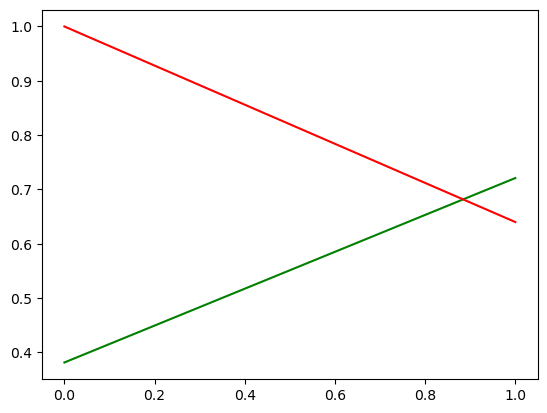

In [291]:
# To plot precision vs recall for different thresholds
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [293]:
# Using 0.95 threshold for predictions
y_train_pred_final['final_predicted_pr'] = y_train_pred_final.predicted.map(lambda x: 1 if x > 0.95 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr
0,0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [327]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.768243661100804

In [329]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3391,  611],
       [ 888, 1578]], dtype=int64)